# **Diabetic Prediction**

**Aim:** Making Diabetic Prediction using:-

* Random Forest Classifier model
* Support Vector Machine (SVM) model - Linear Kernel, RBF & poly
* Logistic Regression model
* K Nearest Neighbour (KNN) model
* Decision Tree Classifier model
* Naive Bayes Model
* XGBoost Classifier Model

& finding the best accuracy.











In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
%matplotlib inline

In [ ]:

# Loading data
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/diabetes2.csv')


In [ ]:
df_temp = df.copy()

In [ ]:
# Viewing First Five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

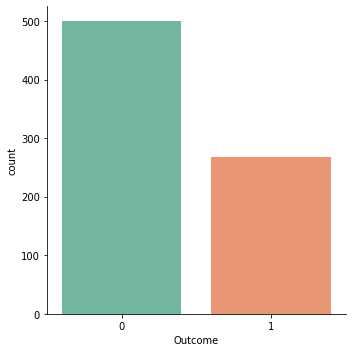

In [ ]:
# Visualizing outcome
sns.catplot(x="Outcome", kind="count", data=df_temp, palette="Set2")
plt.show()

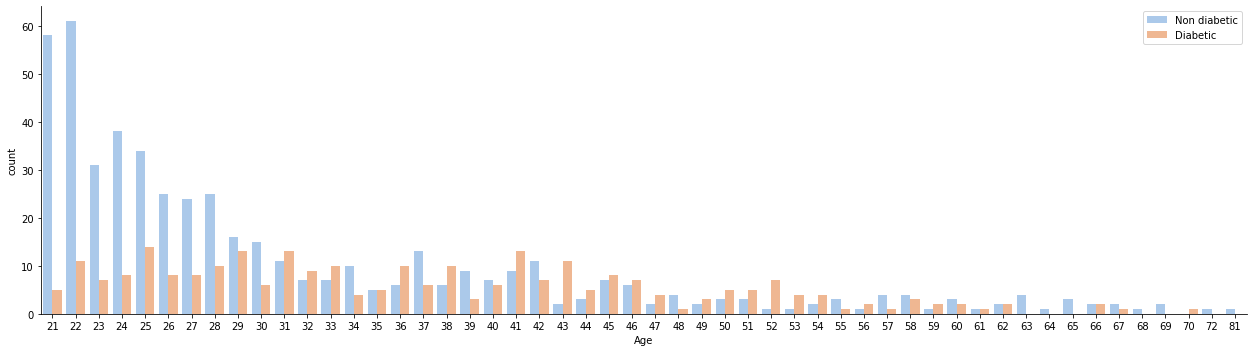

In [ ]:
# Visualizing Number of Diabetics and Non Diabetics patient of different age group
ax = sns.catplot(x="Age", kind="count",hue="Outcome",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])
plt.show()

In [ ]:
# Age Distribution
fig = px.histogram(df, x="Age",
                   marginal="box")
fig.show()

In [ ]:
# Age Distribution for outcome 0
fig = px.histogram(df, x=df[df.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen'])
fig.show()

In [ ]:
# Age Distribution for outcome 1 
fig = px.histogram(df, x=df[df.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['purple'])
fig.show()

In [ ]:
# Glucose Distribution for outcome 1
fig = px.histogram(df, x=df[df.Outcome==1].Glucose,
                   marginal="box",
                   color_discrete_sequence=['#AB63FA'])
fig.show()

In [ ]:
# Average Glucose for Diabetics Patient
df[df.Outcome==1].Glucose.mean()

141.25746268656715

In [ ]:
x = df_temp.drop(['Outcome'], axis = 1)
y = df_temp.loc[:,"Outcome"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


### **Random Forest Classifier**

In [ ]:
model1 = RandomForestClassifier(n_estimators = 100)
model1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_pred = model1.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[343,   0],
       [  0, 171]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 1.0


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[128,  33],
       [ 29,  64]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7559055118110236


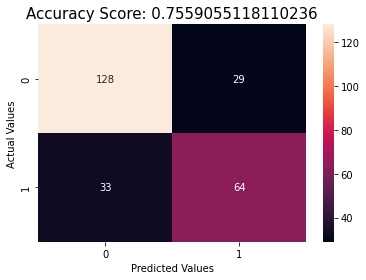

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.688
Recall: 0.660
F1 Score: 0.674


### **Support Vector Machine (SVM)**

##### **SVM** - Linear Kernel

In [ ]:
model2 = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
model2.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
x_pred = model2.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[309,  34],
       [ 85,  86]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.7684824902723736


In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[139,  35],
       [ 18,  62]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7913385826771654


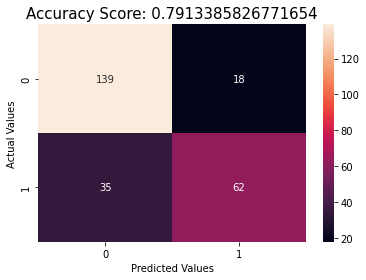

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.775
Recall: 0.639
F1 Score: 0.701


##### **SVM** - RBF

In [ ]:
model3 = svm.SVC(kernel = 'rbf', random_state = 0, C=1.0)
model3.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
x_pred = model3.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[317,  26],
       [ 98,  73]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.7587548638132295


In [ ]:
y_pred = model3.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[149,  50],
       [  8,  47]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7716535433070866


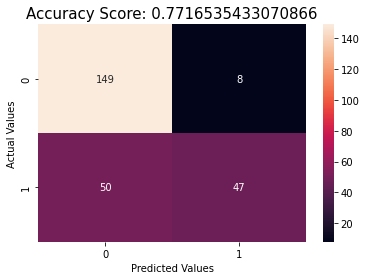

In [ ]:
cm3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm3, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.855
Recall: 0.485
F1 Score: 0.618


##### **SVM** - poly

In [ ]:
model4 = svm.SVC(kernel = 'poly', random_state = 0, C=1.0)
model4.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
x_pred = model4.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[321,  22],
       [100,  71]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.7626459143968871


In [ ]:
y_pred = model4.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[149,  53],
       [  8,  44]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7598425196850394


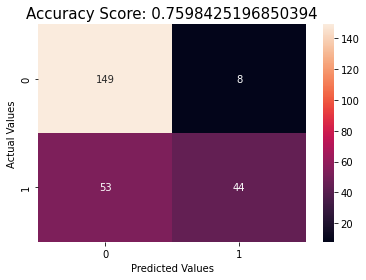

In [ ]:
cm4 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm4, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.846
Recall: 0.454
F1 Score: 0.591


### **Logistic Regression**

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(x_test)

In [ ]:
model5 = LogisticRegression(random_state = 0)
model5.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
x_pred = model5.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[309,  34],
       [ 82,  89]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.77431906614786


In [ ]:
y_pred = model5.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[139,  36],
       [ 18,  61]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7874015748031497


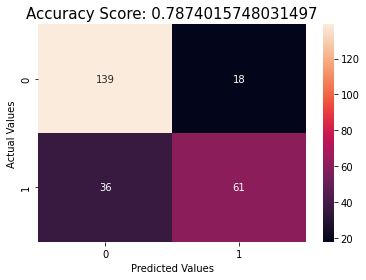

In [ ]:
cm5 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm5, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.772
Recall: 0.629
F1 Score: 0.693


### **K-Nearest Neighbour (KNN)**

In [ ]:
model6 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model6.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
x_pred = model6.predict(x_train)

In [ ]:
confusion_matrix(y_train, x_pred)

array([[312,  31],
       [ 58, 113]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.8268482490272373


In [ ]:
y_pred = model6.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[130,  43],
       [ 27,  54]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7244094488188977


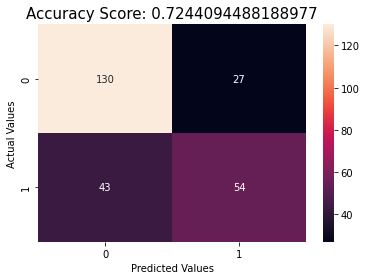

In [ ]:
cm6 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm6, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.667
Recall: 0.557
F1 Score: 0.607


### **Decision Tree Classifier**

In [ ]:
model7 = tree.DecisionTreeClassifier()
model7.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
x_pred = model7.predict(x_train)
confusion_matrix(y_train, x_pred)

array([[343,   0],
       [  0, 171]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 1.0


In [ ]:
y_pred = model7.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[118,  43],
       [ 39,  54]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.6771653543307087


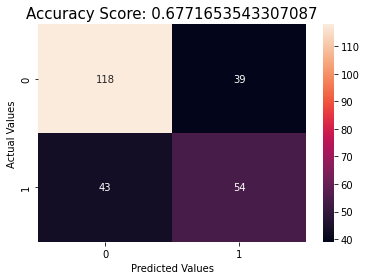

In [ ]:
cm7 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm7, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.581
Recall: 0.557
F1 Score: 0.568


### **Naive Bayes**

In [ ]:
model8 = GaussianNB()
model8.fit(x_train, y_train)

GaussianNB()

In [ ]:
x_pred = model8.predict(x_train)
confusion_matrix(y_train, x_pred)

array([[296,  47],
       [ 70, 101]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 0.7723735408560312


In [ ]:
y_pred = model8.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[135,  38],
       [ 22,  59]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7637795275590551


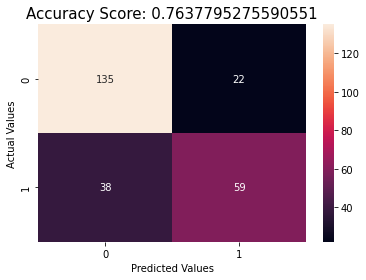

In [ ]:
cm8 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm8, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.728
Recall: 0.608
F1 Score: 0.663


### **XGBoost Classifier**

In [ ]:
model9 = XGBClassifier(n_estimators=100)
model9.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
x_pred = model9.predict(x_train)
confusion_matrix(y_train, x_pred)

array([[343,   0],
       [  0, 171]])

In [ ]:
score = accuracy_score(y_train, x_pred)
print("Training accuracy" ,score)

Training accuracy 1.0


In [ ]:
y_pred = model9.predict(x_test)
confusion_matrix(y_pred,y_test)

array([[127,  30],
       [ 30,  67]])

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Testing accuracy",score)

Testing accuracy 0.7637795275590551


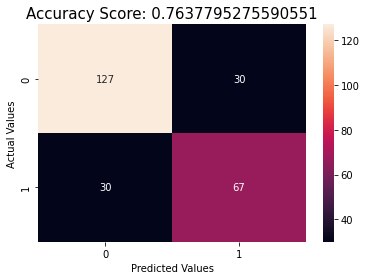

In [ ]:
cm9 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm9, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.691
Recall: 0.691
F1 Score: 0.691


## **Conclusion**


The best accuracy obtained is 0.7913385826771654 using SVM-Linear Kernel model.

